In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

pd.set_option('display.float_format', lambda x: '%e' % x)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


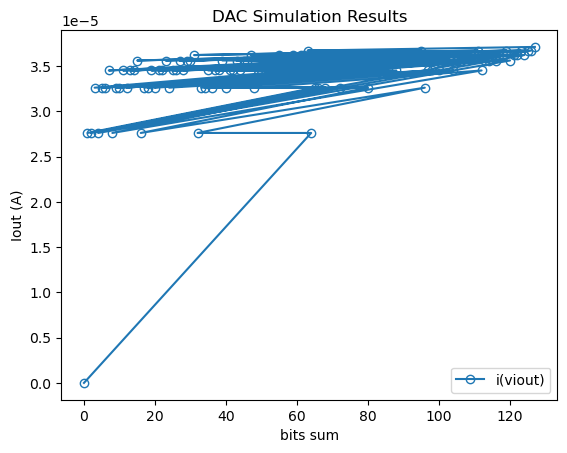

In [18]:
sim = pd.read_csv('sim1 - simulation_L_1.csv')
fig, ax = plt.subplots()
sim['sum'] = sim['v(b0)']*2**6 + sim['v(b1)']*2**5 + sim['v(b2)']*2**4 + sim['v(b3)']*2**3 + sim['v(b4)']*2**2 + sim['v(b5)']*2**1 + sim['v(b6)']*2**0
sim.plot(x='sum', y='i(viout)', ax = ax, marker='o', fillstyle = 'none', title = 'DAC Simulation Results')
plt.xlabel('bits sum')
plt.ylabel('Iout (A)')
plt.savefig("VtoI_plot.svg", format="svg")

1620.9
4.64398255e-07
4.61672444e-07
error = 0.41001457421954596 %


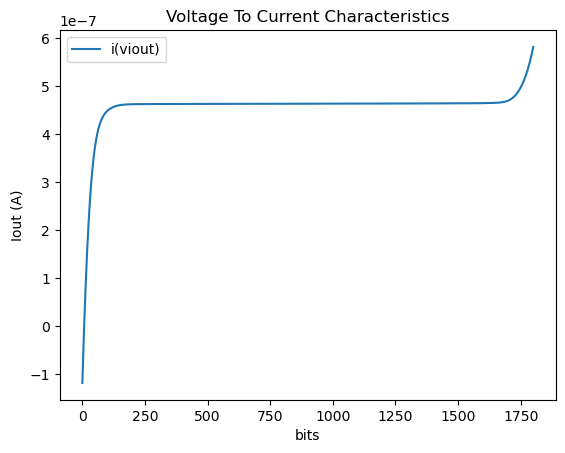

In [123]:
v_i = pd.read_fwf('dac_supply_100k.txt')
fig, ax = plt.subplots()
v_i.plot(y='i(viout)', ax = ax, title = 'Voltage To Current Characteristics')
plt.xlabel('bits')
plt.ylabel('Iout (A)')
plt.savefig("VtoI_plot.svg", format="svg")
print(0.9*len(v_i['i(viout)']))
print(v_i['i(viout)'][1620])
print(v_i['i(viout)'][180])
error = 100*((v_i['i(viout)'][1620] - v_i['i(viout)'][180])/v_i['i(viout)'][180])/1.44
print('error =',error,'%')

162.9
4.15163009e-06
6.02219571e-06
error = 3.124533199745701 %


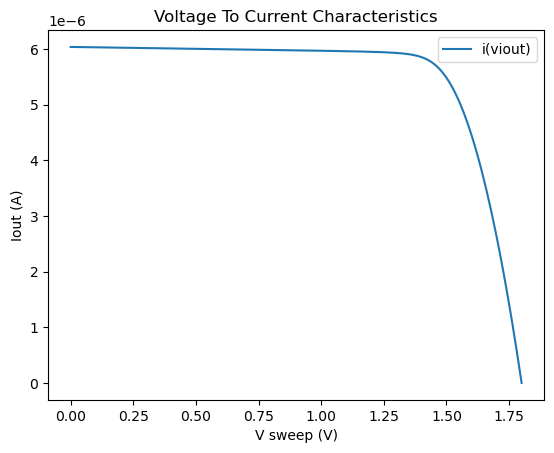

In [49]:
v_i = pd.read_fwf('gen_supply.txt')
fig, ax = plt.subplots()
v_i.plot(x='v-sweep',y='i(viout)', ax = ax, title = 'Voltage To Current Characteristics')
plt.xlabel('V sweep (V)')
plt.ylabel('Iout (A)')
plt.savefig("VtoI_plot.svg", format="svg")
print(0.9*len(v_i['i(viout)']))
print(v_i['i(viout)'][162])
print(v_i['i(viout)'][18])
error = 100*((v_i['i(viout)'][0] - v_i['i(viout)'][144])/v_i['i(viout)'][0])/1.44
print('error =',error,'%')

In [50]:
print(v_i)

         v-sweep     i(viout)       v(Vbp)
0   0.000000e+00 6.034218e-06 1.626258e-06
1   1.000000e-02 6.033550e-06 1.626322e-06
2   2.000000e-02 6.032883e-06 1.626283e-06
3   3.000000e-02 6.032216e-06 1.626299e-06
4   4.000000e-02 6.031549e-06 1.626249e-06
..           ...          ...          ...
176 1.760000e+00 1.151181e-06 1.626290e-06
177 1.770000e+00 8.757118e-07 1.626225e-06
178 1.780000e+00 5.920315e-07 1.626249e-06
179 1.790000e+00 3.001307e-07 1.626263e-06
180 1.800000e+00 0.000000e+00 1.626271e-06

[181 rows x 3 columns]


error = 8.329827306553236 %


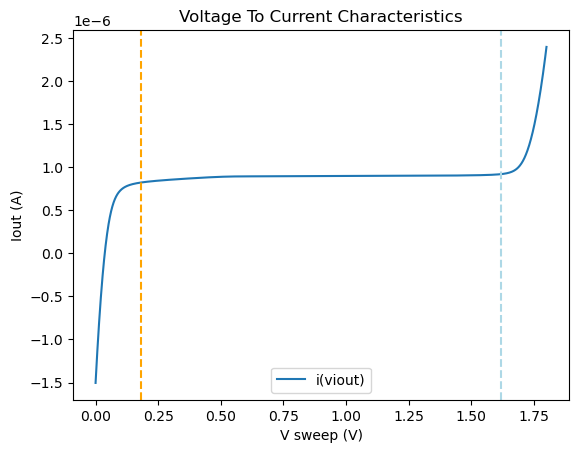

In [225]:
v_i = pd.read_fwf('dac_supply.txt')
fig, ax = plt.subplots()
v_i.plot(x='v-sweep',y='i(viout)', ax = ax, title = 'Voltage To Current Characteristics')
plt.xlabel('V sweep (V)')
plt.ylabel('Iout (A)')
plt.savefig("VtoI_plot.svg", format="svg")
high = 1620
low = 180
plt.axvline(v_i['v-sweep'].iloc[low], color = 'orange', linestyle = '--')
plt.axvline(v_i['v-sweep'].iloc[high], color = 'lightblue', linestyle = '--')
error = 100*((v_i['i(viout)'][high]- v_i['i(viout)'][low])/v_i['i(viout)'][low])/1.44
print('error =',error,'%')